<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/01_Linear_Regression/One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dummy Variables and One Hot Encoding


*   Machine learning models work very well for dataset having only numbers. 
*   But how do we handle text information in dataset? Simple approach is to use interger or label encoding but when categorical variables are nominal,   using simple label encoding can be problematic.
*   One hot encoding is the technique that can help in this situation. In this tutorial, we will use pandas get_dummies method to create dummy variables that allows us to perform one hot encoding on given dataset. 
*   Alternatively we can use sklearn.preprocessing OneHotEncoder as well to create dummy variables.

[Reference](ML/5_one_hot_encoding/one_hot_encoding.ipynb)

**Categorical Variables**
*   Categorical variables are two types. Nominal and Ordinal.
*   Nominal variables dont have any numeric order/relationship between each other. e.g. male, female or e.g. read, green, blue
*   Ordinal variables have some sort of numeric order/relationship between each other. e.g. graduate, masters, phd or e.g. high, medium, low

Since we are dealing with Nominal categorical variables we are going to use One Hot Encoding' techinique here.

How One Hot Encoding Works?
*   Create separate column for each category and assign binary value 1 or 0
*   Extra variables which are created for One Hot Encoding are also called as 'Dummy Variables'

In [0]:
import pandas as pd

In [0]:
# Use this code in case you are running Jupytor locally and CSV file is on local PC
#df = pd.read_csv('one_hot_encoding_homeprices.csv')
#df

In [0]:
from google.colab import files
uploaded = files.upload()

Saving one_hot_encoding_homeprices.csv to one_hot_encoding_homeprices.csv


In [0]:
import io

df =pd.read_csv(io.StringIO(uploaded['one_hot_encoding_homeprices.csv'].decode('utf-8')))
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


## Using pandas get_dummies
Note here town type is in string. We will have to One Hot Encoding for this column.
We will use get_dummies method of pandas to create dummy variables for town column

In [0]:
dummies = pd.get_dummies(df.town) # store the dummy variables in 'dummies' dataframe
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


Now lets join the dummies dataframe with orignal 'df' dataframe

In [0]:
merged_df = pd.concat([df, dummies], axis = 'columns')
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


Since we have dummy variables we can drop the 'town' column
And to avoide the 'Dummy Variable Trap' problem we will also drop 'west windsor' column

In [0]:
final_df = merged_df.drop(['town','west windsor'], axis='columns')
final_df

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


Note that sklearn linear regression model will automatically drop one of the dummy variable column, but its good practice do it by yourself.

Now lets create a linear regression model

In [0]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In our final dataset X is (area,	monroe township,	robinsville) and y is (price). Lets create X and y dataframes for model training

In [0]:
X = final_df.drop(['price'], axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [0]:
y = final_df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

Since we have X and y now lets train the model

In [0]:
lr_model.fit(X,y)

SInce model is trained we can predict the values. Remember X format is (area, monroe township, robinsville). So to predict the price of house whose area is 2800 sqft and township is robinsville format will be >> [2800, 0, 1]

In [0]:
lr_model.predict([[2800,0,1]])

array([590775.63964739])

Similary lets predict the price of house in 'west windsor' town with area 3400

In [0]:
lr_model.predict([[3400,0,0]])

array([681241.66845839])

**Check the score of your model**

In [0]:
lr_model.score(X,y)

0.9573929037221873

## Using sklearn OneHotEncoder

First step is to use label encoder to convert town names into numbers

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
df_le = df # creating separate dataframe for label encoder
df_le.town = le.fit_transform(df_le.town) # assign labels to 'town' column and update its value in dataframe
df_le

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


Now lets create X variable

In [0]:
X = df_le[['town','area']].values # using values here because we want two dimensional array and not dataframe
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

Notice that now X has only two columns, one with label for each town and another with area.
Similarly create a y variable

In [0]:
y = df_le.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000])

We need to create dummy variable columns for each of town in 'town' column

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder(categorical_features[0]) # This doesnot work, use below code

# we need to provide the categorical feature column index here.
transformer = ColumnTransformer(transformers=[("town",OneHotEncoder(categories='auto'), [0])],remainder='passthrough')

In [0]:
X = transformer.fit_transform(X.tolist())
X

array([[1.0, 0.0, 0.0, 2600],
       [1.0, 0.0, 0.0, 3000],
       [1.0, 0.0, 0.0, 3200],
       [1.0, 0.0, 0.0, 3600],
       [1.0, 0.0, 0.0, 4000],
       [0.0, 0.0, 1.0, 2600],
       [0.0, 0.0, 1.0, 2800],
       [0.0, 0.0, 1.0, 3300],
       [0.0, 0.0, 1.0, 3600],
       [0.0, 1.0, 0.0, 2600],
       [0.0, 1.0, 0.0, 2900],
       [0.0, 1.0, 0.0, 3100],
       [0.0, 1.0, 0.0, 3600]], dtype=object)

Now we have three dummy variables columns for town and price column is as it is.

Now lets remove one dummy variable column to avoid 'Dummy Variable Trap'

In [0]:
X =X[: , 1:] # First part of ',' means takes all the rows and second part means take all column from index 1. Means drop column with index 0
X

array([[0.0, 0.0, 2600],
       [0.0, 0.0, 3000],
       [0.0, 0.0, 3200],
       [0.0, 0.0, 3600],
       [0.0, 0.0, 4000],
       [0.0, 1.0, 2600],
       [0.0, 1.0, 2800],
       [0.0, 1.0, 3300],
       [0.0, 1.0, 3600],
       [1.0, 0.0, 2600],
       [1.0, 0.0, 2900],
       [1.0, 0.0, 3100],
       [1.0, 0.0, 3600]], dtype=object)

Since we have final X and y lets train the model

In [0]:
from sklearn.linear_model import LinearRegression

lr_model_le = LinearRegression()

lr_model_le.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
lr_model_le.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [0]:
lr_model_le.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

#Exercise
exercise_one_hot_encoding_carprices.csv file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

## We will solve this exercise using sklearn One Hot Encoder

**Step#1:** Load the data

In [0]:
uploaded = files.upload()

Saving exercise_one_hot_encoding_carprices.csv to exercise_one_hot_encoding_carprices.csv


In [0]:
e_df = pd.read_csv(io.StringIO(uploaded['exercise_one_hot_encoding_carprices.csv'].decode('utf-8')))
e_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


**Step#2:** Plot the scatter plot chart

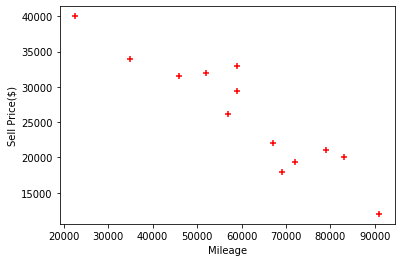

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(e_df['Mileage'],e_df['Sell Price($)'], color = 'red', marker = '+')

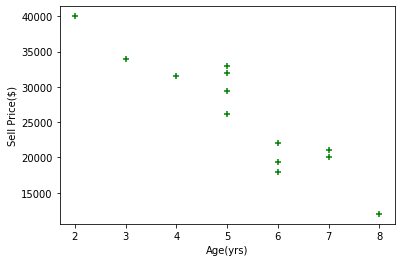

In [0]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(e_df['Age(yrs)'],e_df['Sell Price($)'], color = 'green', marker = '+')

**Step#3:** Use label encoder to convert 'car models' into numbers

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # le > label encoder

In [0]:
e_df_le = e_df
e_df_le['Car Model'] = le.fit_transform(e_df_le['Car Model'])
e_df_le

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


**Step#4:** Create X variable using columns 'Car Model','Mileage', 'Age(yrs)'

In [0]:
X = e_df_le[['Car Model','Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

**Step#5:** Create y variable using column 'price'

In [0]:
y = e_df_le['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

**Step#6:** Now use one hot encoder to create dummy variables for each of the car model

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(transformers=[("Sell Price($)",OneHotEncoder(categories='auto'), [0])],remainder='passthrough')

In [0]:
X = transformer.fit_transform(X.tolist())
X

array([[0.0, 1.0, 0.0, 69000, 6],
       [0.0, 1.0, 0.0, 35000, 3],
       [0.0, 1.0, 0.0, 57000, 5],
       [0.0, 1.0, 0.0, 22500, 2],
       [0.0, 1.0, 0.0, 46000, 4],
       [1.0, 0.0, 0.0, 59000, 5],
       [1.0, 0.0, 0.0, 52000, 5],
       [1.0, 0.0, 0.0, 72000, 6],
       [1.0, 0.0, 0.0, 91000, 8],
       [0.0, 0.0, 1.0, 67000, 6],
       [0.0, 0.0, 1.0, 83000, 7],
       [0.0, 0.0, 1.0, 79000, 7],
       [0.0, 0.0, 1.0, 59000, 5]], dtype=object)

Note here:
 first dummy variable column for 'BMW'
 second dummy variable column for 'Audi'
 third dummy variable column for 'Mercedez Benz'
**Step#7:** Now we have three dummy variables column, lets drop one of them to avoid dummy variable trap problem

In [0]:
X = X[:,1:]
X

array([[1.0, 0.0, 69000, 6],
       [1.0, 0.0, 35000, 3],
       [1.0, 0.0, 57000, 5],
       [1.0, 0.0, 22500, 2],
       [1.0, 0.0, 46000, 4],
       [0.0, 0.0, 59000, 5],
       [0.0, 0.0, 52000, 5],
       [0.0, 0.0, 72000, 6],
       [0.0, 0.0, 91000, 8],
       [0.0, 1.0, 67000, 6],
       [0.0, 1.0, 83000, 7],
       [0.0, 1.0, 79000, 7],
       [0.0, 1.0, 59000, 5]], dtype=object)

**Step#8:** Now lets train the model with final X and y values

In [0]:
from sklearn.linear_model import LinearRegression

e_lr_model_le = LinearRegression()

e_lr_model_le.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**A: Model score**

In [0]:
e_lr_model_le.score(X,y)

0.9417050937281082

**A: Price of mercedez benz that is 4 yr old with mileage 45000**

**Note here-**
 first two column are for model type(Audi and Mercedez Benz and we have removed first column which was for BMW)                       
 third for model price and last for age

Check the values of X with dummy variables, whenever 'mercedez benz' value is 1 rest two column values are 0, 0. Since we have removed first column, correct value to predict 'mercedez benz' is 0,1

In [0]:
e_lr_model_le.predict([[0,1,45000,4]])

array([36991.31721062])

**A: Price of BMW X5 that is 7 yr old with mileage 86000**

**Note here-**
 first two column are for model type(Audi and Mercedez Benz and we have removed first column which was for BMW)                       
 third for model price and last for age

Check the values of X with dummy variables, whenever 'BMW' value is 1 rest two column values are 1, 0 hence for BMW first two column values will be 1, 0

In [0]:
e_lr_model_le.predict([[1,0,86000,7]])

array([11080.74313219])